<a href="https://colab.research.google.com/github/fatiabob/telco_churn_propensity/blob/main/JB_Link_Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project - Mentor Analysis**

**JB Link Telco Customer Churn**

Hi Guys! my name is Fatia from. I was a mentor on MSIB Kampus merdeka Data Science program sponsored by Ministry of Education and Culture Republic of Indonesia. Here's the final project I provide for my students. I hope this helps and do reach me out if you guys have any questions or feedback. Thank you! ^_^


**Data Preparation**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import files

# Loading Modules
import warnings; warnings.simplefilter('ignore')

# !pip install graphviz
# !pip install dtreeviz
from pandas.plotting import scatter_matrix
from sklearn import model_selection, tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# from dtreeviz.trees import *
from IPython.core.display import display, HTML

sns.set(style="ticks", color_codes=True)

In [4]:
files = files.upload()

Saving telco_churn_data.csv to telco_churn_data.csv


In [5]:
df = pd.read_csv("telco_churn_data.csv")
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [ ]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


null value on 'Churn Category' and 'Churn Reason' will be replaced as 'unknown'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [ ]:
# Apply style plots
plt.style.use("fivethirtyeight")

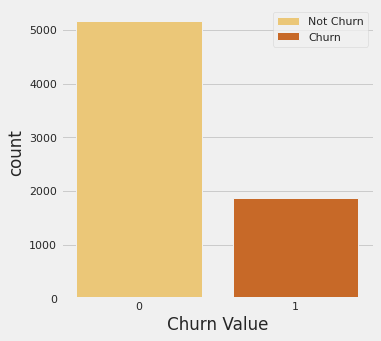

In [ ]:
# Display frequency distribution
plt.figure(figsize = (5,5))
ax = sns.countplot(x = df['Churn Value'] , hue = df['Churn Value'], dodge = False, palette = "YlOrBr", linewidth = 1)
ax.legend(labels = ['Not Churn', 'Churn'])
plt.show()

In [ ]:
# Create a function boxplot
plots = {1 : [111], 2 : [121, 122], 3 : [131, 132, 133], 4 : [221, 222, 223, 224], 5 : [231, 232, 233, 234, 235], 6 : [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
  rows = int(str(plots[len(y)][0])[0])
  columns = int(str(plots[len(y)][0])[1])
  plt.figure(figsize = (7*columns, 7*rows))

  for i, j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sns.boxplot(x = x, y = j, data = df[[x, j]], palette = 'YlOrBr', linewidth = 1)
    ax.set_title(j)

  return plt.show()

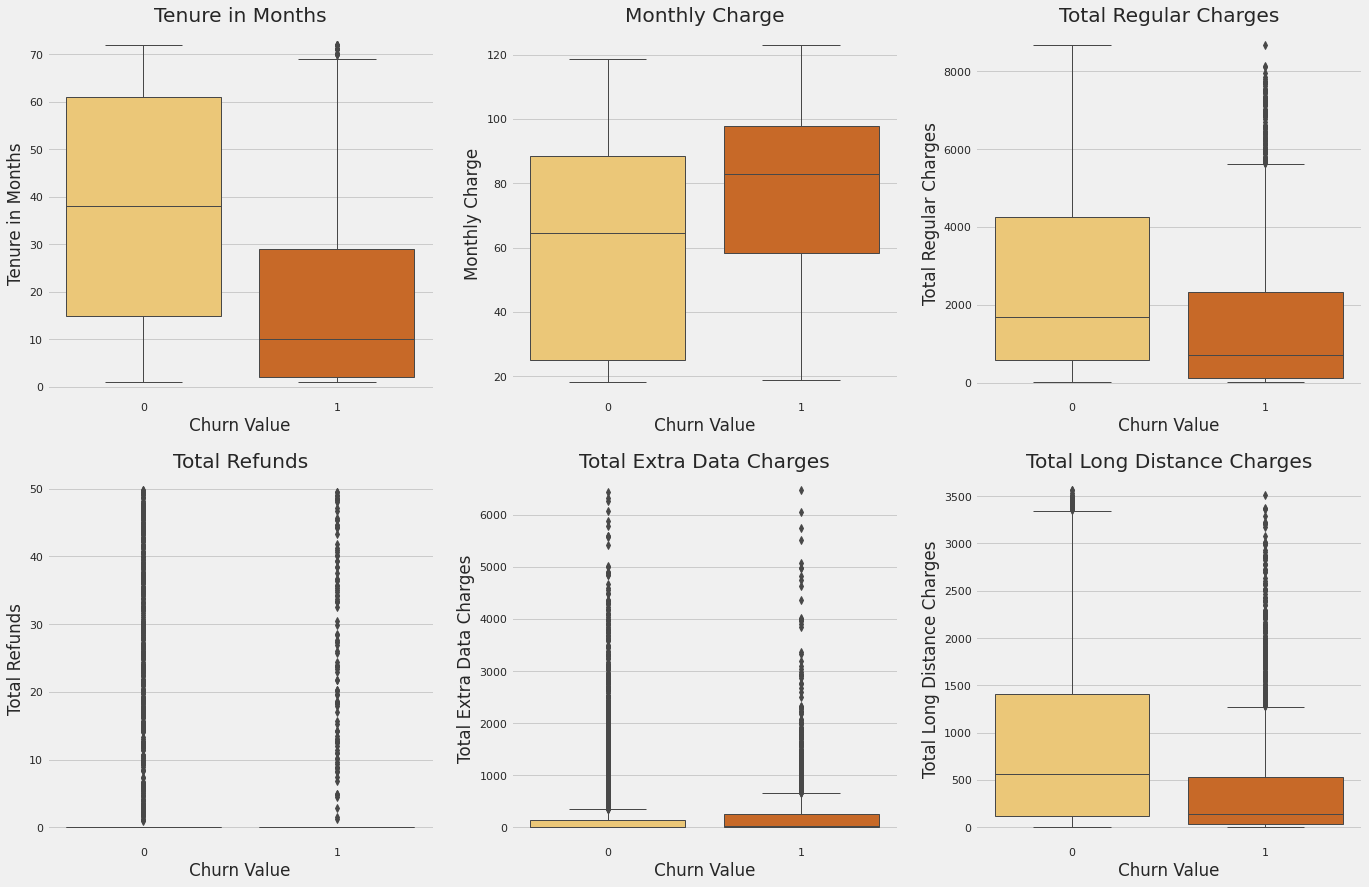

In [ ]:
# Boxplot terhadap nilai float
boxplot("Churn Value", ["Tenure in Months", "Monthly Charge", "Total Regular Charges", "Total Refunds", "Total Extra Data Charges", "Total Long Distance Charges"], df)

**Data Exploration**

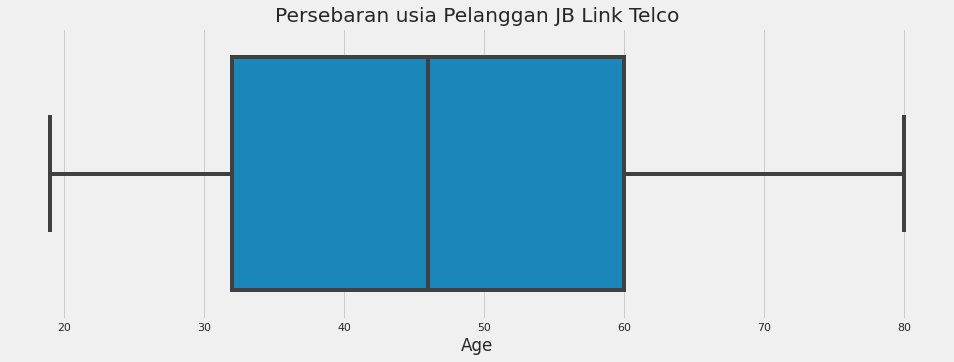

In [ ]:
fig, ax=plt.subplots(figsize=(15,5))
ax.set_title('Persebaran usia Pelanggan JB Link Telco', loc='center',)
sns.boxplot(x=df['Age'])
plt.show()

In [ ]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object
mode:  0    Male
dtype: object
Male      3555
Female    3488
Name: Gender, dtype: int64


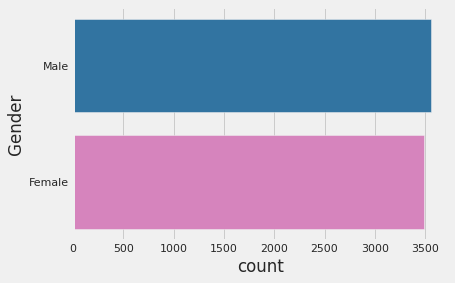

In [ ]:
c_palette = ['tab:blue','tab:pink']
categorical_summarized(df, y = 'Gender', palette=c_palette)

In [ ]:
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Churn Value', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction'],
      dtype='object')

In [6]:
# numerical data checked through correlation
dfx = df[['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
          'Monthly Charge', 'Total Regular Charges',
          'Age', 'Number of Dependents',
          'Churn Value', 'CLTV', 'Total Customer Svc Requests',
          'Product/Service Issues Reported']]

<Axes: >

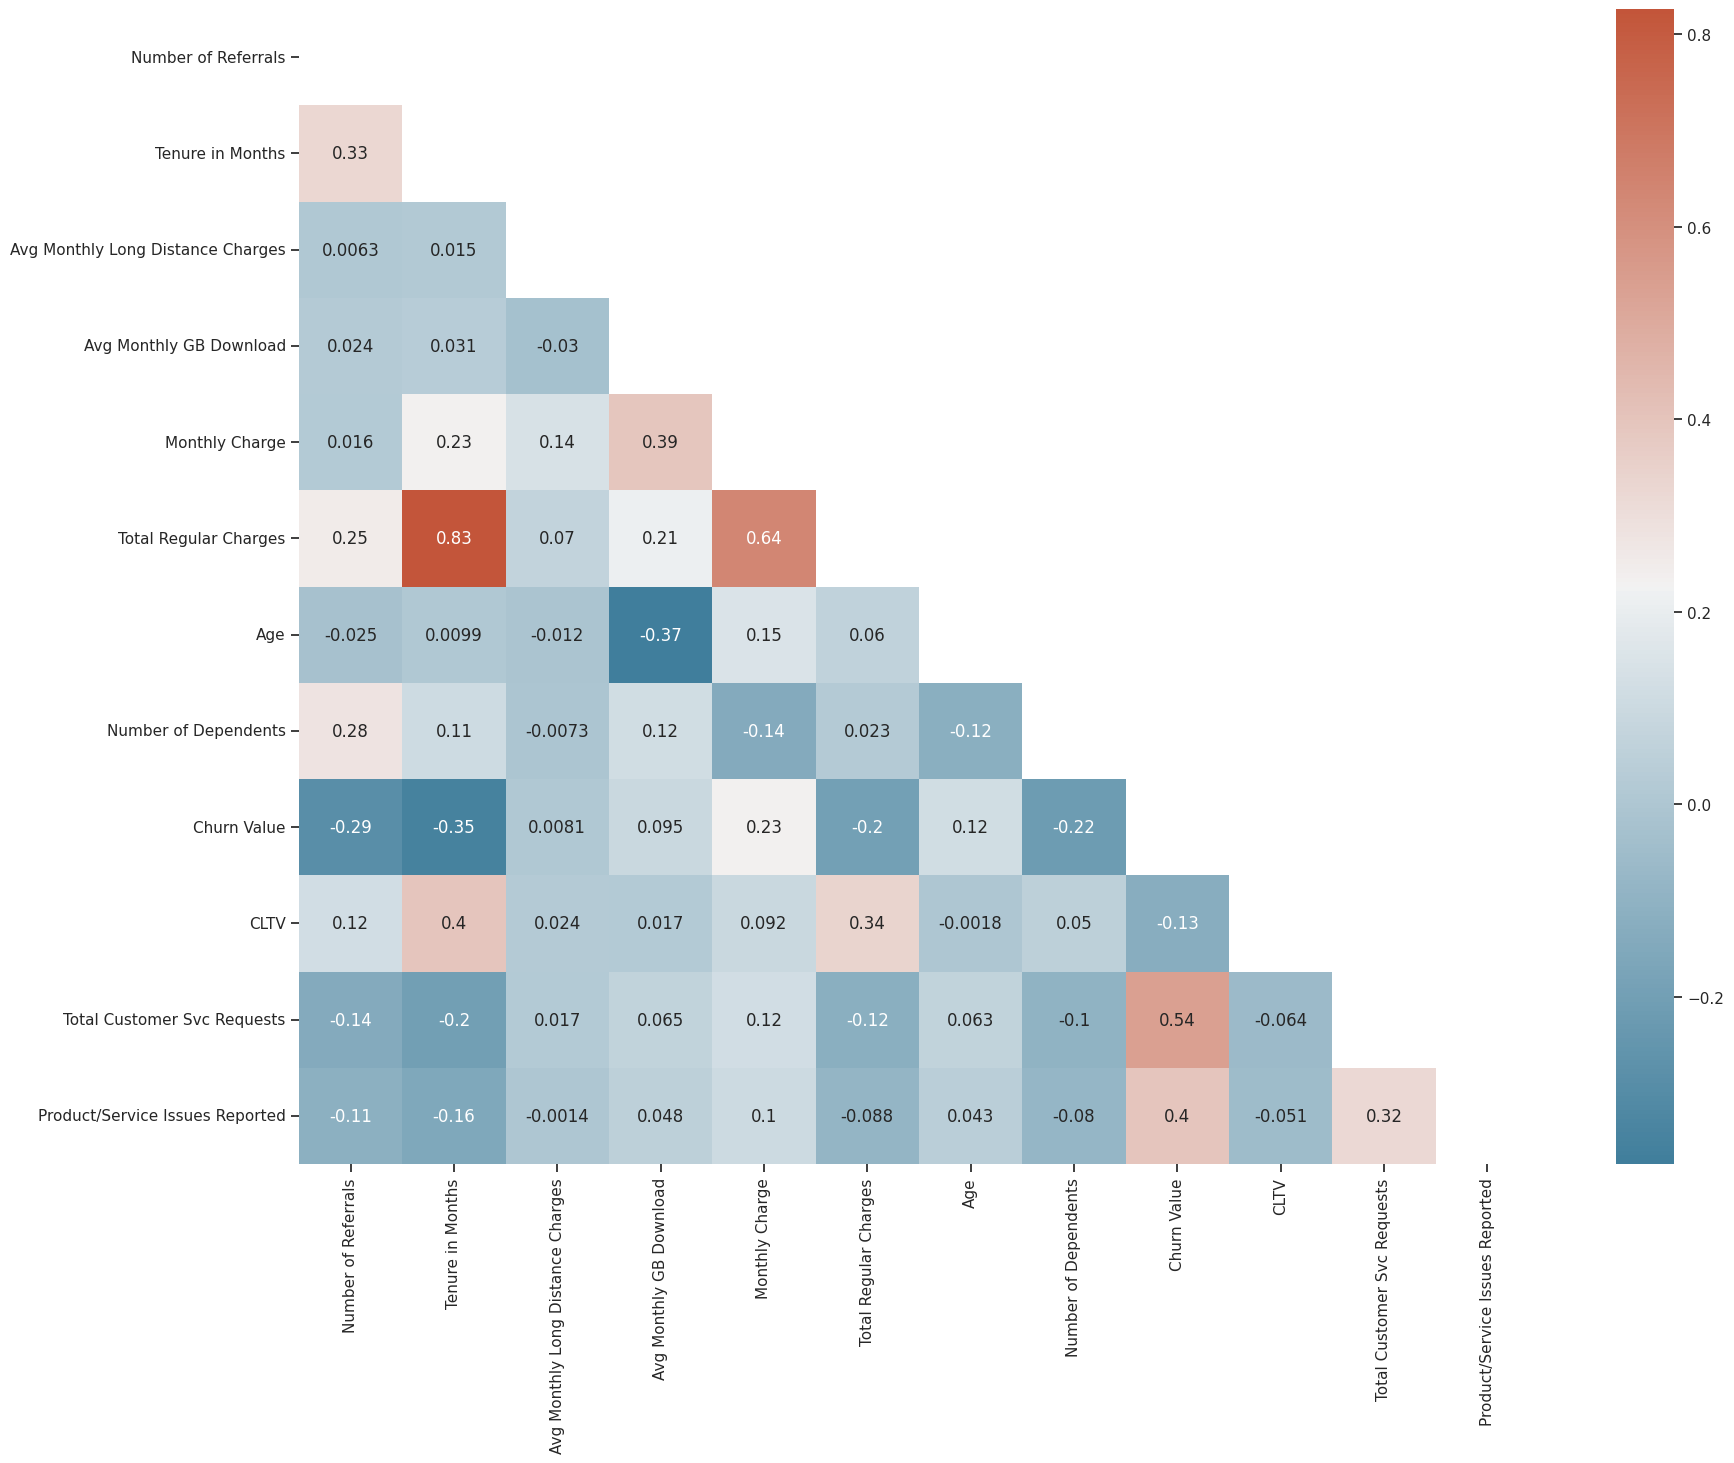

In [7]:
# Correlation between different variables
#
corr = dfx.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 15))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


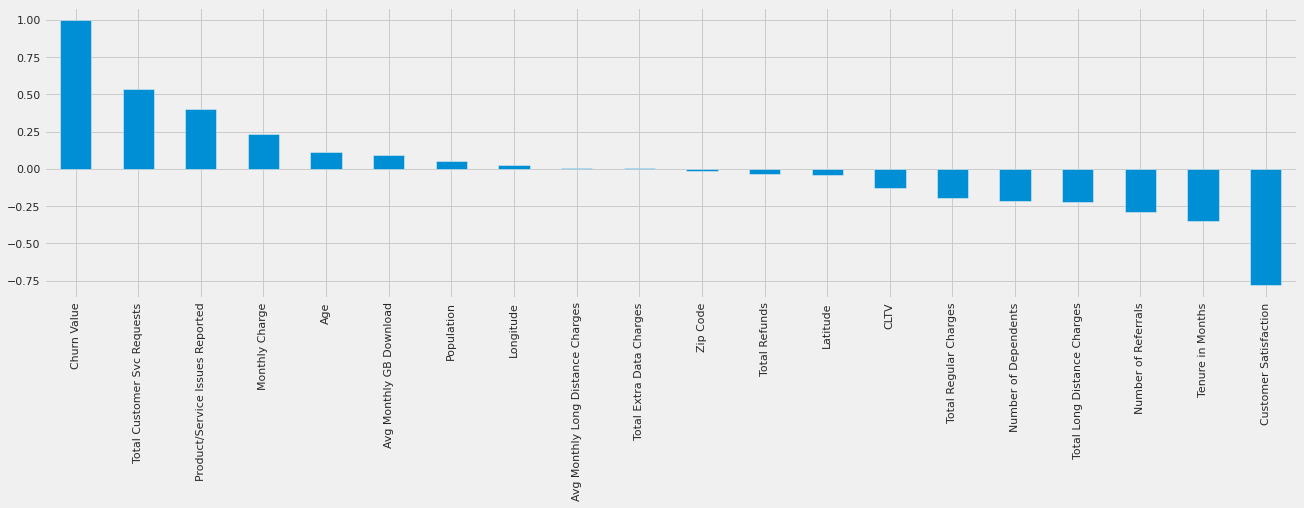

In [ ]:
plt.figure(figsize = (16, 10))
df.corr()['Churn Value'].sort_values(ascending = False).plot(kind = 'bar', figsize = (20, 5))

Hipotesis 1 di jawab dengan menggunakan visualisasi dari google studio

count    7043.000000
mean        0.308107
std         0.717514
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Product/Service Issues Reported, dtype: float64
mode:  0    0
dtype: int64
0    5621
1     897
2     373
3      97
4      43
5       8
6       4
Name: Product/Service Issues Reported, dtype: int64


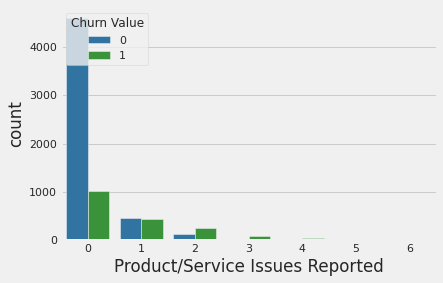

In [ ]:
# Hasil hipotesis 2
c_palette = ['tab:blue','tab:green']
categorical_summarized(df, x = 'Product/Service Issues Reported', hue='Churn Value', palette=c_palette)

count            7043
unique              4
top       Fiber Optic
freq             2291
Name: Internet Type, dtype: object
mode:  0    Fiber Optic
dtype: object
Fiber Optic    2291
DSL            1680
Cable          1546
None           1526
Name: Internet Type, dtype: int64


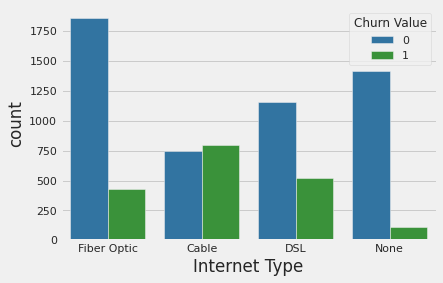

In [ ]:
# Hasil hipotesis 3
c_palette = ['tab:blue','tab:green']
categorical_summarized(df, x = 'Internet Type', hue='Churn Value', palette=c_palette)

Hasil hipotesis 4 di jawab dengan menggunakan visualisasi dari tableau

In [ ]:
# Deff counplot
def countplot(x, y, df):

  rows = int(str(plots[len(y)][0])[0])
  columns = int(str(plots[len(y)][0])[1])

  plt.figure(figsize = (7*columns, 7*rows))

  for i, j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sns.countplot(x = j, hue = x, data = df, palette = 'YlOrBr', alpha = 0.8, linewidth = 0.4, edgecolor = 'black')
    ax.set_title(j)

  return plt.show()

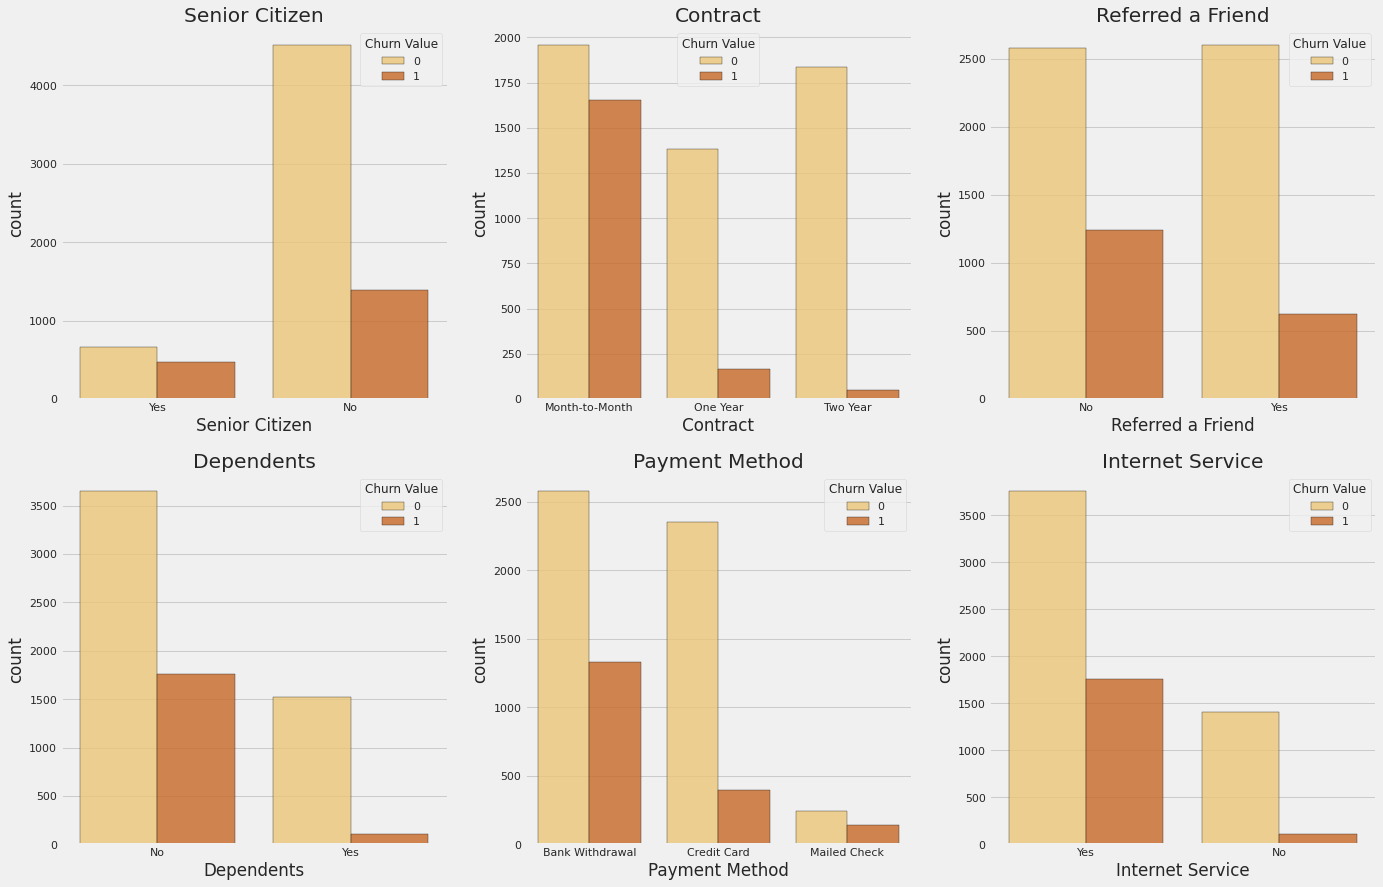

In [ ]:
countplot('Churn Value', ['Senior Citizen', 'Contract', 'Referred a Friend', 'Dependents', 'Payment Method', 'Internet Service'], df)

In [8]:
# Membuat kolom baru untuk melihat additional service pelanggan
df['Additional Service'] = (df[['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support']] == 'Yes').sum(axis = 1)

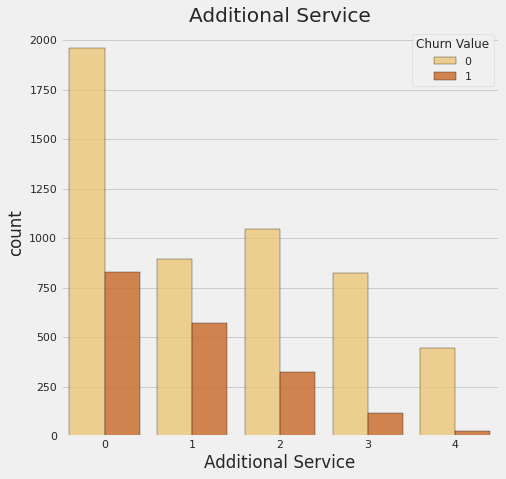

In [ ]:
# Membuat barchart untuk melihat insight dari additional service
countplot('Churn Value', ['Additional Service'], df)

**Data Pre Processing**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      7043 non-null   int64  
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      5517 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [7]:
for i in df.columns:
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique Customer ID's count: 7043
['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']

Unique Referred a Friend's count: 2
['No' 'Yes']

Unique Number of Referrals's count: 12
[ 0  1  6  2  4  3  7  5  8  9 10 11]

Unique Tenure in Months's count: 72
[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]

Unique Offer's count: 5
[nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']

Unique Phone Service's count: 2
['No' 'Yes']

Unique Avg Monthly Long Distance Charges's count: 3584
[ 0.   48.85 11.33 ... 44.99 44.98  8.62]

Unique Multiple Lines's count: 2
['No' 'Yes']

Unique Internet Service's count: 2
['Yes' 'No']

Unique Internet Type's count: 3
['Fiber Optic' 'Cable' 'DSL' nan]

Unique Avg Monthly GB Download's count: 63
[ 9 19 57 13 15 20 33 26 21 32 31 12 10  8 16  2 11  6 14  0 30 2

In [8]:
df.duplicated().sum()

0

In [ ]:
# Check null entries
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [9]:
# Drop column if 60% null
df.drop(['Churn Category','Churn Reason','Customer Satisfaction'], axis = 1, inplace = True)

# Drop column yang tidak diperlukan
df.drop(['Customer ID', 'Latitude', 'Longitude', 'Zip Code', 'City', 'Population'], axis = 1, inplace = True)

In [10]:
df.loc[df["Offer"] == "None", "Offer"] = "Other"

In [11]:
df['Offer'].head()

0        NaN
1    Offer E
2    Offer D
3    Offer C
4    Offer C
Name: Offer, dtype: object

In [ ]:
# Check null entries
df.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

In [11]:
# Checking outliers
n_features = ["Tenure in Months", "Monthly Charge", "Total Regular Charges", "Total Refunds", "Total Extra Data Charges", "Total Long Distance Charges"]
df_n = df[n_features]
df_n.describe()

Q1 = df_n.quantile(0.25)
Q3 = df_n.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_n < (Q1 - 1.5 * IQR)) | (df_n > (Q3 + 1.5 * IQR))).any()

Tenure in Months               False
Monthly Charge                 False
Total Regular Charges          False
Total Refunds                   True
Total Extra Data Charges        True
Total Long Distance Charges     True
dtype: bool

In [12]:
# Drop column yang memiliki banyak outlier
df.drop(['Total Refunds', 'Total Extra Data Charges'], axis = 1, inplace = True)

In [13]:
# Label Encoding
feat_enc = ['Gender', 'Referred a Friend', 'Dependents', 'Phone Service', 'Paperless Billing', 'Senior Citizen', 'Married', 'Under 30']

# Function Labeling
def label_encoding(features, df):
  for i in features:
    df[i] = df[i].map({'Yes' : 1, 'No' : 0})
  return

label_encoding(['Referred a Friend', 'Dependents', 'Phone Service', 'Paperless Billing', 'Senior Citizen', 'Married', 'Under 30'], df)

df['Gender'] = df['Gender'].map({'Female': 1, 'Male':0})

In [14]:
# One Hot Encoding
feat_ohe = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
            'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Contract', 'Payment Method', 'Additional Service',
            'Internet Type', 'Unlimited Data', 'Offer']

df = pd.get_dummies(df, columns = feat_ohe)

In [15]:
# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

feat_mms = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges']
df_feat_mms = pd.DataFrame(df, columns = feat_mms)
df_remaining_feat = df.drop(columns = feat_mms)

mms = MinMaxScaler()
rescaled_feat = mms.fit_transform(df_feat_mms)

df_resc_feat = pd.DataFrame(rescaled_feat, columns = feat_mms, index = df_remaining_feat.index)
df = pd.concat([df_remaining_feat, df_resc_feat], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn Value', axis = 1)
X = X1.values
y = df['Churn Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
var = list(X1.columns)
var

['Referred a Friend',
 'Number of Referrals',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Paperless Billing',
 'Total Long Distance Charges',
 'Gender',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',
 'CLTV',
 'Total Customer Svc Requests',
 'Product/Service Issues Reported',
 'Multiple Lines_No',
 'Multiple Lines_Yes',
 'Internet Service_No',
 'Internet Service_Yes',
 'Online Security_No',
 'Online Security_Yes',
 'Online Backup_No',
 'Online Backup_Yes',
 'Device Protection Plan_No',
 'Device Protection Plan_Yes',
 'Premium Tech Support_No',
 'Premium Tech Support_Yes',
 'Streaming TV_No',
 'Streaming TV_Yes',
 'Streaming Movies_No',
 'Streaming Movies_Yes',
 'Streaming Music_No',
 'Streaming Music_Yes',
 'Contract_Month-to-Month',
 'Contract_One Year',
 'Contract_Two Year',
 'Payment Method_Bank Withdrawal',
 'Payment Method_Credit Card',
 'Payment Method_Mailed Check',
 'Additional Service_0',
 '

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score

In [ ]:
# Define a function that plots the feature weights for a classifier
def feat_weights(X_df, classifier, classifier_name):
  weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending = False)

  top_weights_selected = weights[:10]
  plt.figure(figsize = (7, 6))
  plt.tick_params(labelsize = 10)
  plt.title(f'{classifier_name} - Top 10 Features')
  top_weights_selected.plot(kind = "bar")

  bottom_weights_selected = weights[-10:]
  plt.figure(figsize = (7, 6))
  plt.tick_params(labelsize = 10)
  plt.title(f'{classifier_name} - Bottom 10 Features')
  bottom_weights_selected.plot(kind = "bar")

  return print("")

In [ ]:
# Define a function
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
  fig, ax = plt.subplots(figsize = (7, 6))
  plot_confusion_matrix(classifier, X_test, y_test, display_labels = ["No Churn", "Churn"], cmap = plt.cm.Blues, normalize = None, ax = ax)
  ax.set_title(f'{classifier_name} - Confusion Matrix')
  plt.show()

  fig, ax = plt.subplots(figsize = (7, 6))
  plot_confusion_matrix(classifier, X_test, y_test, display_labels = ["No Churn", "Churn"], cmap = plt.cm.Blues, normalize = 'true', ax = ax)
  ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
  plt.show()

  print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
  print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
  return print("")

In [ ]:
# Define a function
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

  y_pred_prob = y_pred_probabilities[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label = f'{classifier_name}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{classifier_name} - ROC Curve')
  plt.show()

  return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [ ]:
# Define a function
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):

  y_pred_prob = y_pred_probabilities[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

  plt.plot(recall, precision, label = f'{classifier_name}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'{classifier_name} - Precision-Recall Curve')
  plt.show()

  f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)

  return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

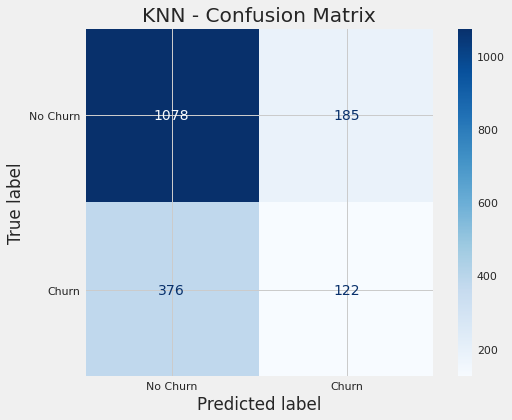

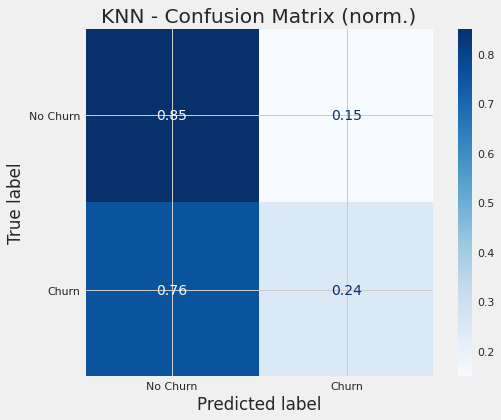

Accuracy Score Test: 0.6814310051107325
Accuracy Score Train: 0.7991291177584249 (as comparison)



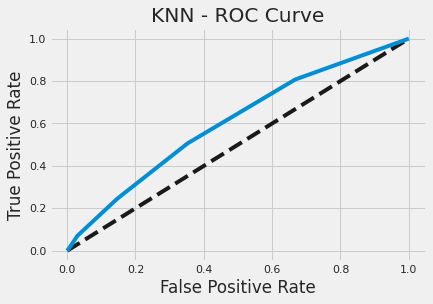

AUC Score (ROC): 0.6040909481155023



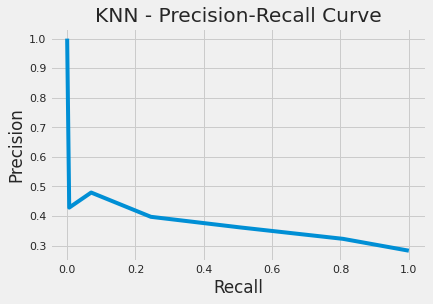

F1 Score: 0.3031055900621118 
AUC Score (PR): 0.3705850583836127



In [ ]:
# Plot
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[1078  185]
 [ 376  122]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1263
           1       0.40      0.24      0.30       498

    accuracy                           0.68      1761
   macro avg       0.57      0.55      0.55      1761
weighted avg       0.64      0.68      0.65      1761



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make Predict
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

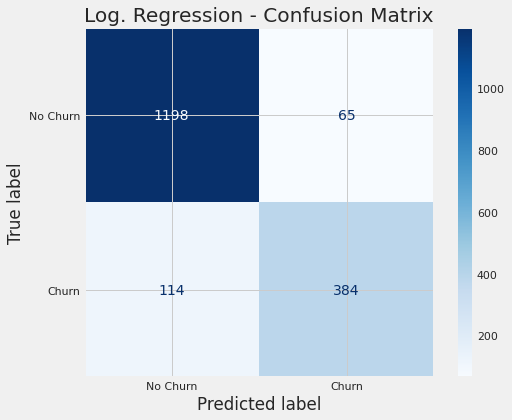

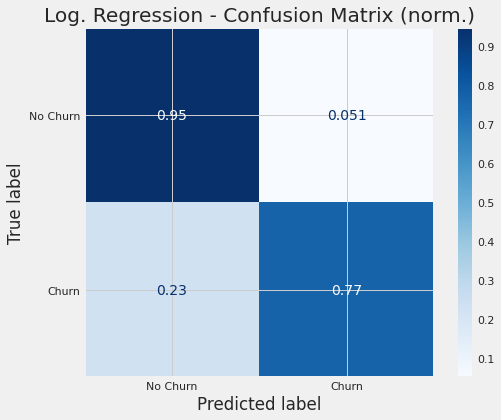

Accuracy Score Test: 0.8983532084043158
Accuracy Score Train: 0.9140477092010602 (as comparison)



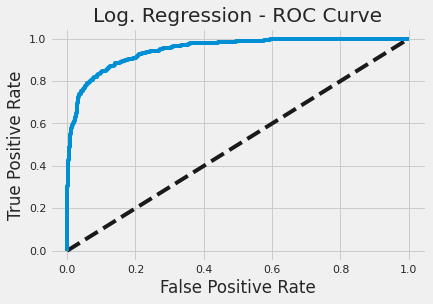

AUC Score (ROC): 0.9482554127833582



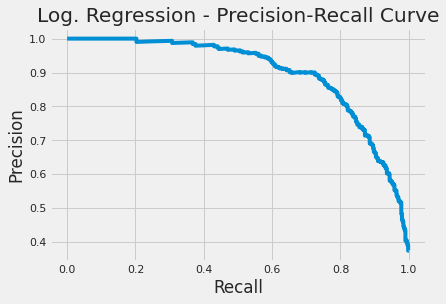

F1 Score: 0.8109820485744456 
AUC Score (PR): 0.8994953001427419



In [ ]:
# Plot
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

In [ ]:
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[1198   65]
 [ 114  384]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1263
           1       0.86      0.77      0.81       498

    accuracy                           0.90      1761
   macro avg       0.88      0.86      0.87      1761
weighted avg       0.90      0.90      0.90      1761



**Random Forest**

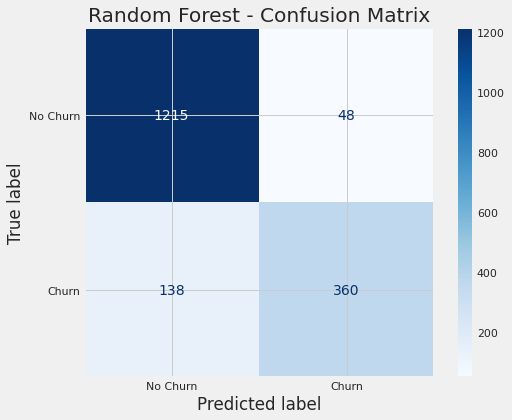

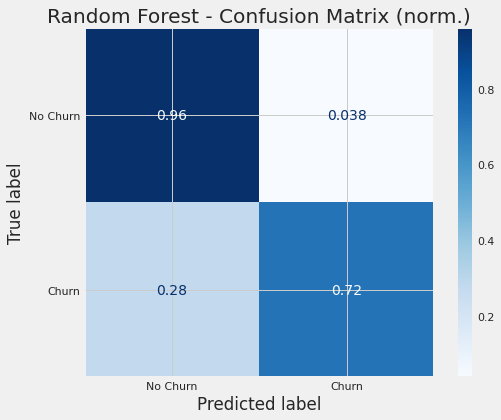

Accuracy Score Test: 0.8943781942078365
Accuracy Score Train: 1.0 (as comparison)



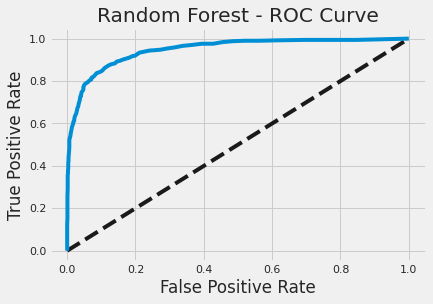

AUC Score (ROC): 0.9471822364676442



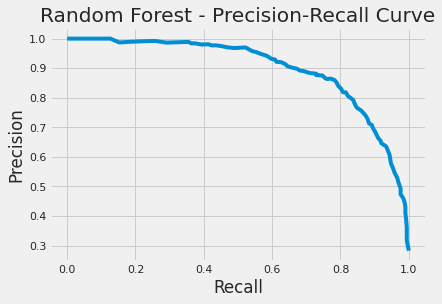

F1 Score: 0.7947019867549668 
AUC Score (PR): 0.8998133445847941



In [ ]:
from sklearn.ensemble import RandomForestClassifier

randfor = RandomForestClassifier()
randfor.fit(X_train, y_train)

y_pred_rf = randfor.predict(X_test)
y_pred_rf_prob = randfor.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, randfor, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1215   48]
 [ 138  360]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1263
           1       0.88      0.72      0.79       498

    accuracy                           0.89      1761
   macro avg       0.89      0.84      0.86      1761
weighted avg       0.89      0.89      0.89      1761



Text(0.5, 1.0, 'Feature Importances-Random Forest')

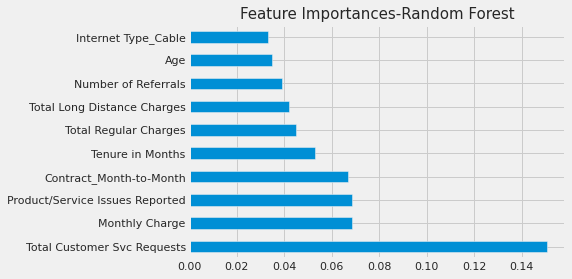

In [ ]:
feat_importances = pd.Series(randfor.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances-Random Forest', fontsize = 15)

**Decision Tree**

In [ ]:
#Importing the library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
from sklearn import datasets
from sklearn import tree
import matplotlib as mpl

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# Build the model and Evaluate
seed=9
dt_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=seed) # Default Gini
dt = dt_model.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

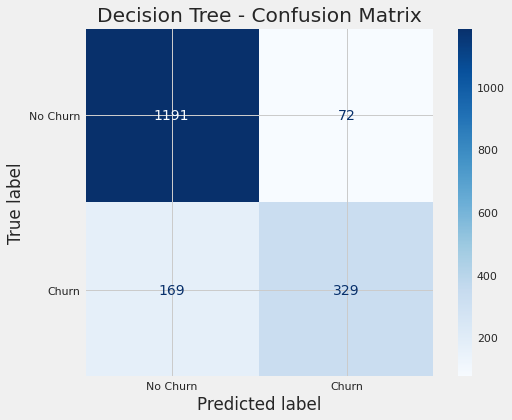

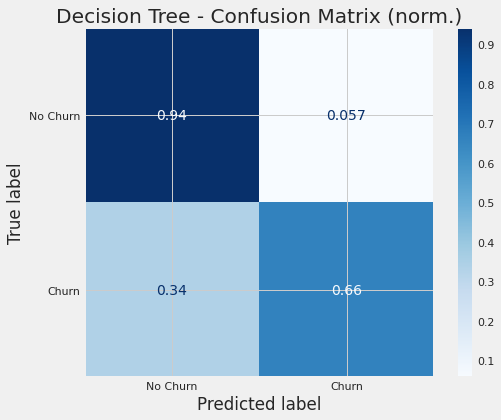

Accuracy Score Test: 0.8631459398069279
Accuracy Score Train: 0.8826202196137827 (as comparison)



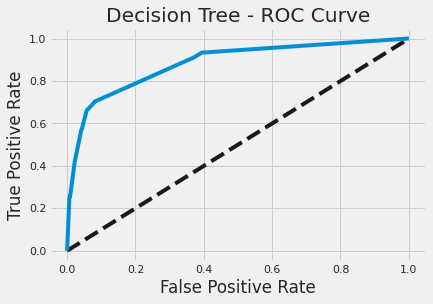

AUC Score (ROC): 0.8828441239224515



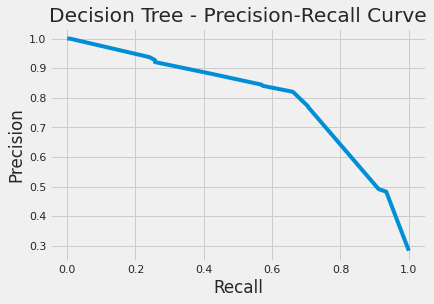

F1 Score: 0.7319243604004451 
AUC Score (PR): 0.802147377175489



In [ ]:
dt_model.fit(X_train, y_train)

dt_prediction = dt.predict(X_test)
y_pred_dt = dt.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, dt_model, dt_prediction, 'Decision Tree')
roc_curve_auc_score(X_test, y_test, y_pred_dt, 'Decision Tree')
precision_recall_curve_and_scores(X_test, y_test, dt_prediction, y_pred_dt, 'Decision Tree')

In [ ]:
print('Akurasi = ', accuracy_score(y_test, dt_prediction))
print(confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test, dt_prediction))

Akurasi =  0.8631459398069279
[[1191   72]
 [ 169  329]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1263
           1       0.82      0.66      0.73       498

    accuracy                           0.86      1761
   macro avg       0.85      0.80      0.82      1761
weighted avg       0.86      0.86      0.86      1761



Text(0.5, 1.0, 'Feature Importances-Decision Tree')

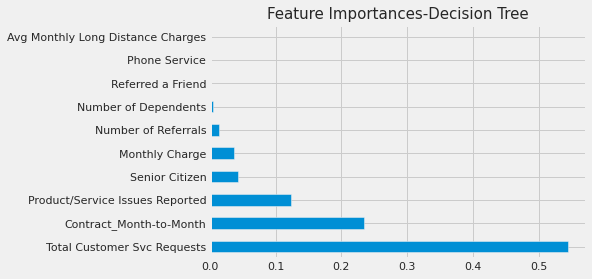

In [ ]:
feat_importances = pd.Series(dt_model.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances-Decision Tree', fontsize = 15)

In [ ]:
fn = list(X1.columns)
fn

['Referred a Friend',
 'Number of Referrals',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Paperless Billing',
 'Total Long Distance Charges',
 'Gender',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',
 'CLTV',
 'Total Customer Svc Requests',
 'Product/Service Issues Reported',
 'Multiple Lines_No',
 'Multiple Lines_Yes',
 'Internet Service_No',
 'Internet Service_Yes',
 'Online Security_No',
 'Online Security_Yes',
 'Online Backup_No',
 'Online Backup_Yes',
 'Device Protection Plan_No',
 'Device Protection Plan_Yes',
 'Premium Tech Support_No',
 'Premium Tech Support_Yes',
 'Streaming TV_No',
 'Streaming TV_Yes',
 'Streaming Movies_No',
 'Streaming Movies_Yes',
 'Streaming Music_No',
 'Streaming Music_Yes',
 'Contract_Month-to-Month',
 'Contract_One Year',
 'Contract_Two Year',
 'Payment Method_Bank Withdrawal',
 'Payment Method_Credit Card',
 'Payment Method_Mailed Check',
 'Additional Service_0',
 '

In [ ]:
plt.style.use('default')
mpl.rcParams['text.color'] = 'black'

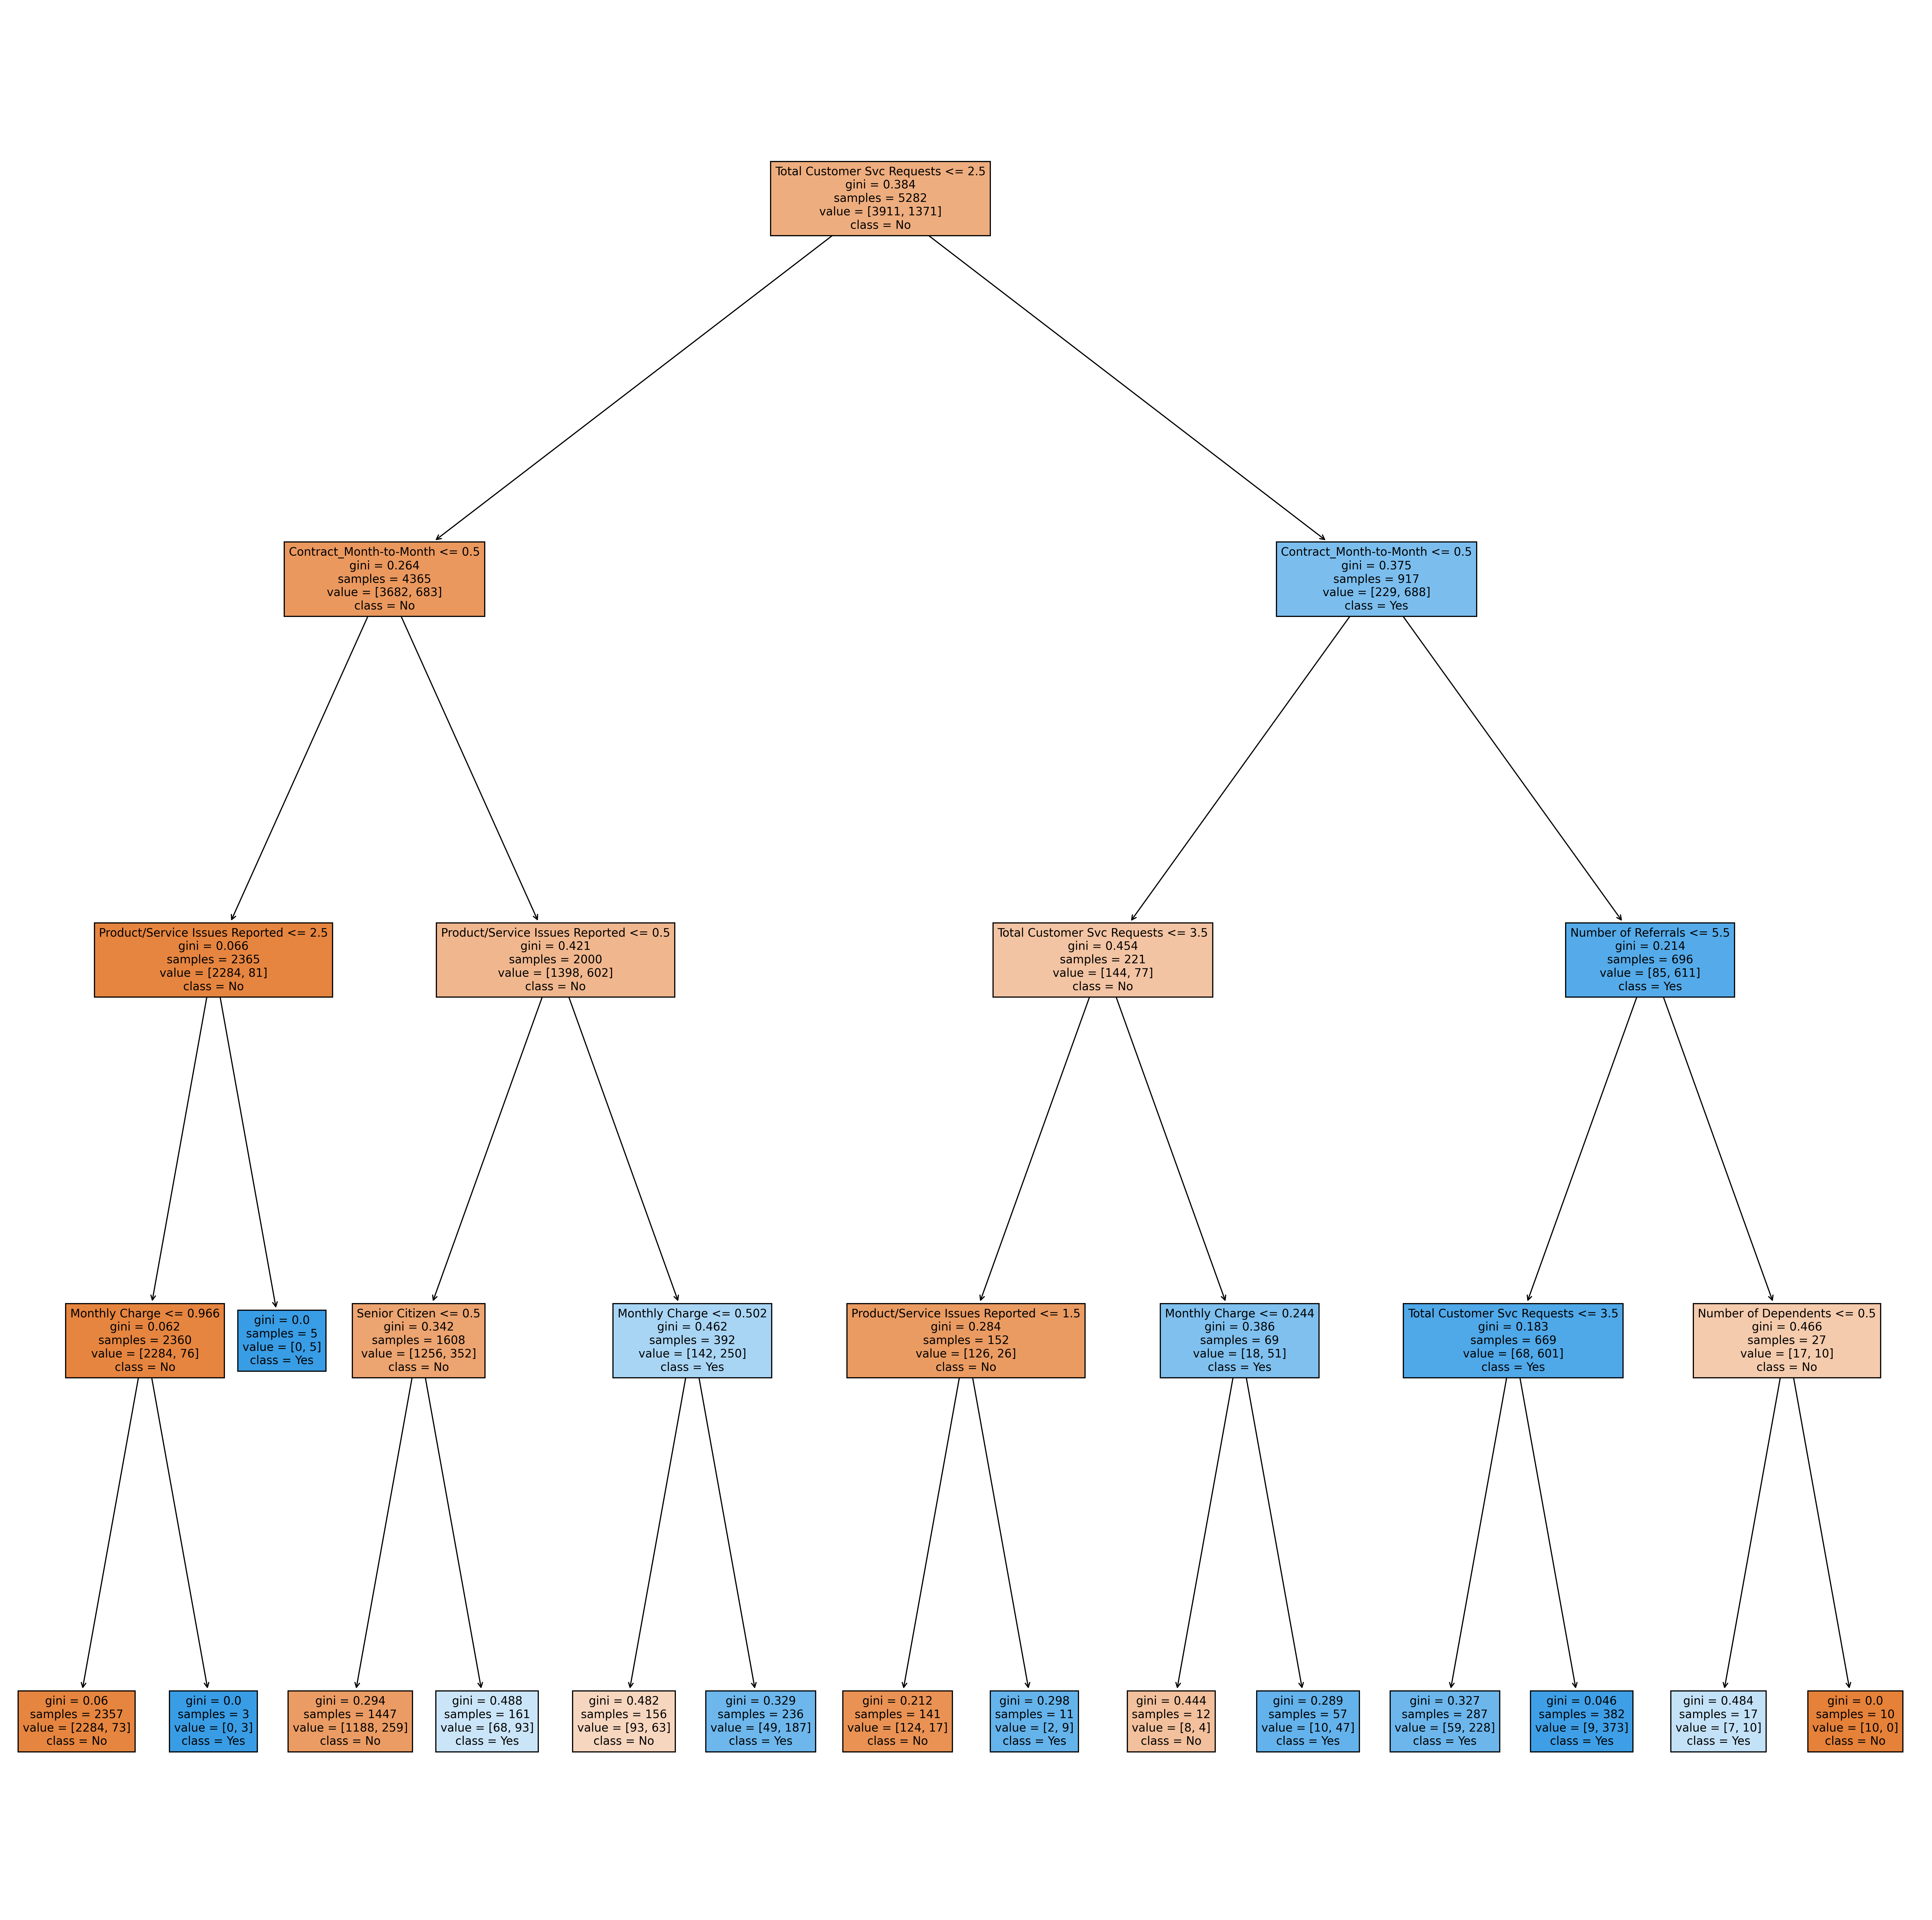

In [ ]:
cn=['No', 'Yes']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)

tree.plot_tree(dt,
               feature_names = fn,
               class_names=cn,
               filled = True,
               fontsize=10);

fig.savefig('Churn Value.png')


sumber decision tree: https://www.w3schools.com/python/python_ml_decision_tree.asp

**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

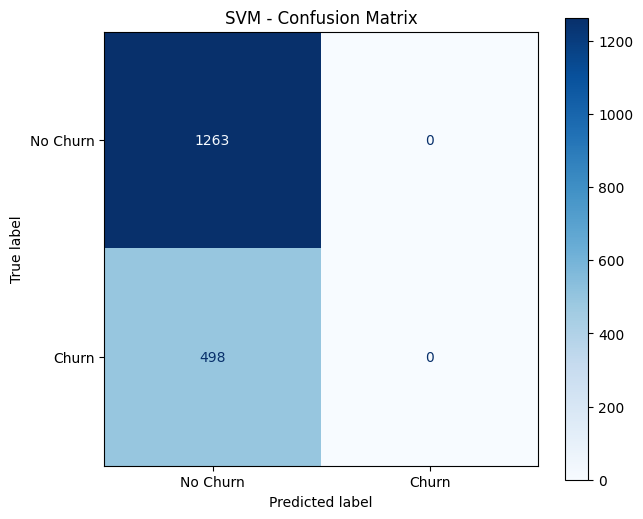

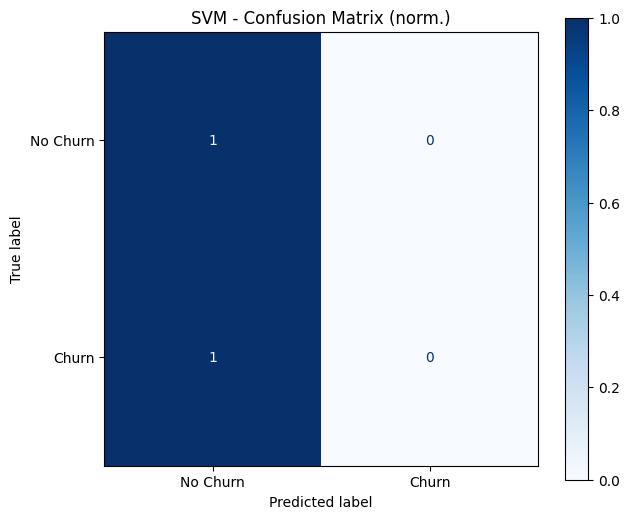

Accuracy Score Test: 0.717206132879046
Accuracy Score Train: 0.7404392275653162 (as comparison)



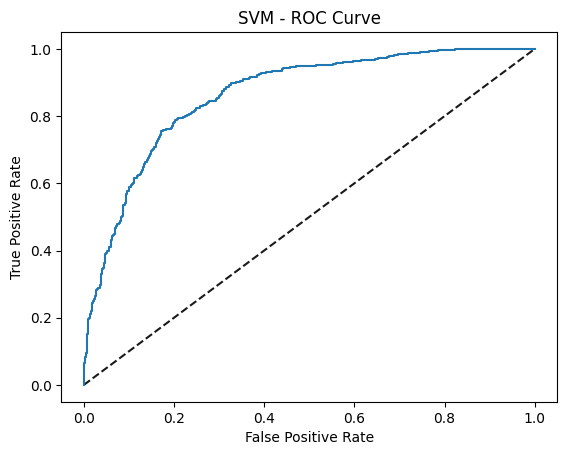

AUC Score (ROC): 0.8633600117015965



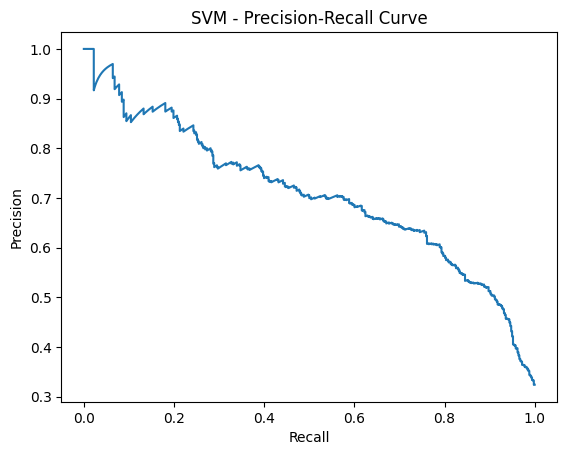

F1 Score: 0.0 
AUC Score (PR): 0.7072656209560778



In [ ]:
from sklearn.svm import SVC

suvm = SVC(kernel = 'rbf', probability = True)
suvm.fit(X_train, y_train)

y_pred_svm = suvm.predict(X_test)
y_pred_svm_prob = suvm.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, suvm, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

In [ ]:
#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'rbf')

#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)

#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)

#menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1263
           1       0.00      0.00      0.00       498

    accuracy                           0.72      1761
   macro avg       0.36      0.50      0.42      1761
weighted avg       0.51      0.72      0.60      1761



**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

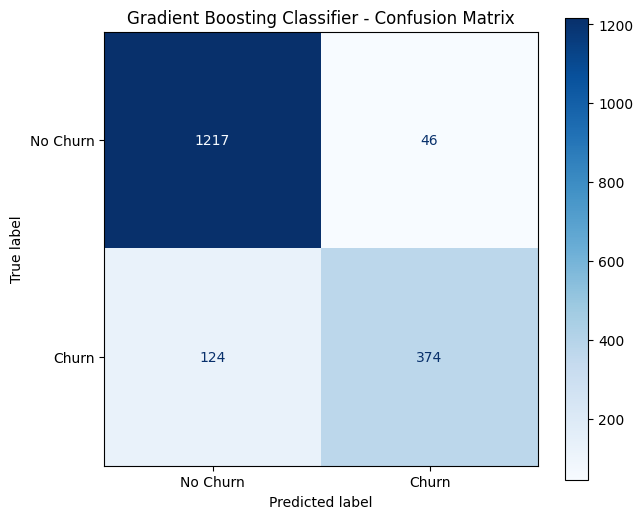

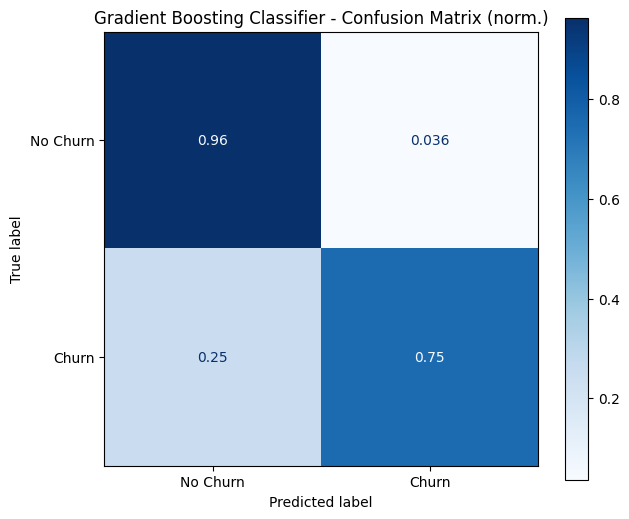

Accuracy Score Test: 0.9034639409426463
Accuracy Score Train: 0.9367663763725862 (as comparison)



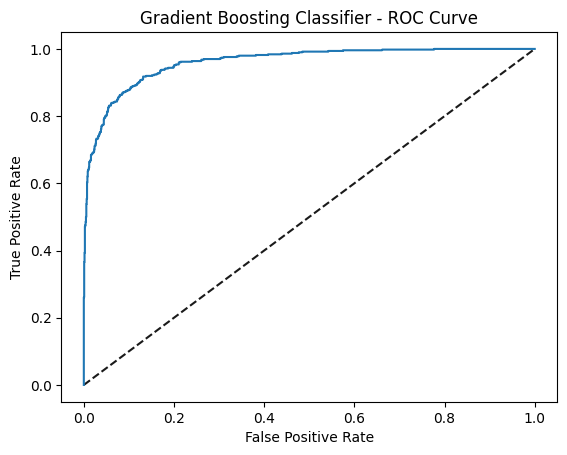

AUC Score (ROC): 0.9604204625310426



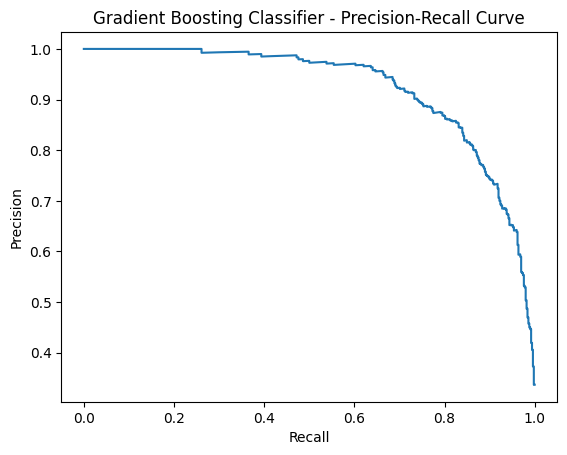

F1 Score: 0.8148148148148149 
AUC Score (PR): 0.9227292784276092



In [ ]:
gb.fit(X_train, y_train)

gb_prediction = gb.predict(X_test)
y_pred_gb = gb.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, gb, gb_prediction, 'Gradient Boosting Classifier')
roc_curve_auc_score(X_test, y_test, y_pred_gb, 'Gradient Boosting Classifier')
precision_recall_curve_and_scores(X_test, y_test, gb_prediction, y_pred_gb, 'Gradient Boosting Classifier')

In [ ]:
print('Akurasi = ', accuracy_score(y_test, gb_prediction))
print(confusion_matrix(y_test, gb_prediction))
print(classification_report(y_test, gb_prediction))

Akurasi =  0.9034639409426463
[[1217   46]
 [ 124  374]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1263
           1       0.89      0.75      0.81       498

    accuracy                           0.90      1761
   macro avg       0.90      0.86      0.87      1761
weighted avg       0.90      0.90      0.90      1761



Text(0.5, 1.0, 'Feature Importances-Gradient Boosting Classifier')

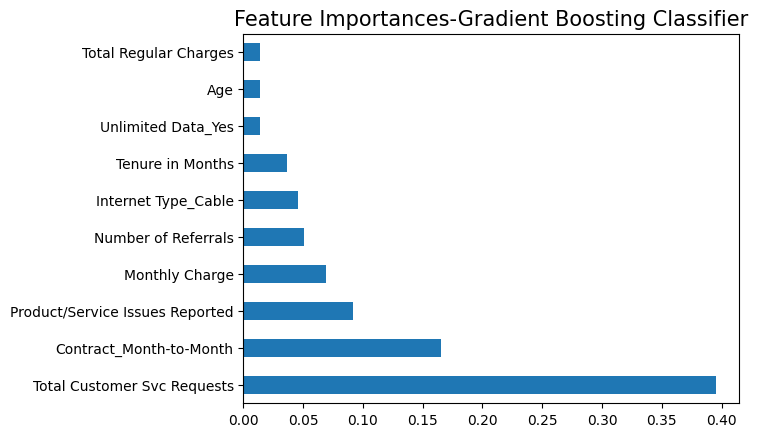

In [ ]:
feat_importances = pd.Series(gb.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances-Gradient Boosting Classifier', fontsize = 15)

## **XGBoost**

In [3]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [1]:
import xgboost as xgb

In [2]:
model = xgb.XGBClassifier(
#         objective ='binary:logistic',
#         n_estimators = 200,
#         use_label_encoder=False,
#         eval_metric='error',
#         random_state=42
#         #,class_weight='balanced'
#         #,max_depth=10
#         #,col_pos_weight= 9.253164556962025,
#         ,booster='gbtree'
#         ,tree_method='gpu_hist'
    )

In [18]:
# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Define Function
def CMatrix(CM, labels=['churn','active']):
    dfc = pd.DataFrame(data=CM, index=labels, columns=labels)
    dfc.index.name='REAL'
    dfc.columns.name='PREDICTION'
    dfc.loc['Total'] = dfc.sum()
    dfc['Total'] = dfc.sum(axis=1)
    return dfc

In [21]:
metrics2 = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'])

In [23]:
metrics2.loc['accuracy','xgb full'] = accuracy_score(y_test,y_pred)
metrics2.loc['precision','xgb full'] = precision_score(y_test,y_pred,pos_label=1)
metrics2.loc['recall','xgb full'] = recall_score(y_test,y_pred,pos_label=1)
metrics2.loc['f1_score','xgb full'] = f1_score(y_test,y_pred,pos_label=1)
100*metrics2

,xgb full
accuracy,92.106758
precision,89.800443
recall,81.325301
f1_score,85.353003


In [24]:
CM2 = confusion_matrix(y_test,y_pred)
CMatrix(CM2)

PREDICTION,churn,active,Total
REAL,,,
churn,1217,46,1263
active,93,405,498
Total,1310,451,1761


In [25]:
pred_proba =model.predict_proba(X_test)[:,1]

In [27]:
#the default proba is 0.5
# if you want to adjust the probability default of the model and see how is your model performing you can try use this code
y_pred_test = (pred_proba >= 0.7).astype('int')
#Confusion matrix
print("Accuracy: ", accuracy_score(y_pred=y_pred_test, y_true=y_test))
print("Recall: ", recall_score(y_pred=y_pred_test, y_true=y_test, pos_label=1))
print("Precision: ", precision_score(y_pred=y_pred_test, y_true=y_test, pos_label=1))
print("f1_score: ", f1_score(y_pred=y_pred_test, y_true=y_test, pos_label=1))

Accuracy:  0.9131175468483816
Recall:  0.7550200803212851
Precision:  0.9238329238329238
f1_score:  0.8309392265193369


Text(0.5, 1.0, 'Feature Importances-XGBoost Classifier')

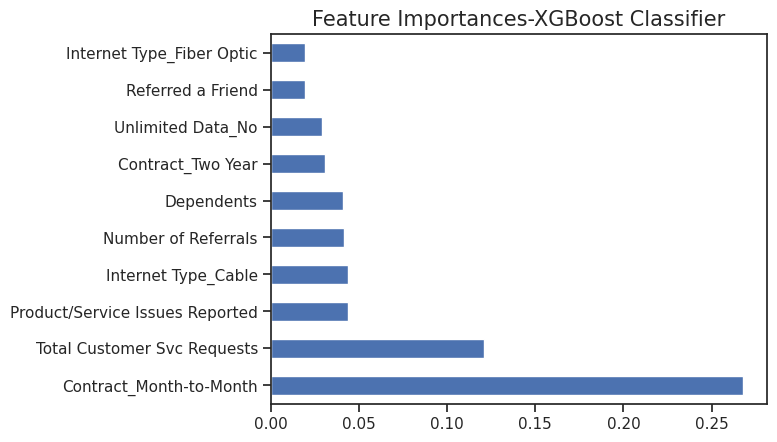

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances-XGBoost Classifier', fontsize = 15)

In [30]:
#save your model
import joblib
final2 = model

filename3 = 'xgb_churn_telco.sav'
joblib.dump(final2,filename3)

['xgb_churn_telco.sav']

I like to use shap summary plot for more comperhensive explanation about feature importance especially to the business user, I'll explain it more on the next part!